In [1]:
# if (!requireNamespace("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")

# BiocManager::install("ComplexHeatmap")

library(ComplexHeatmap)
library(maftools);
library(R.utils);


# apollo_maf = "/juno/work/shah/users/vatrtwaa/cbioportal_tools/example/apollo_outputs/data_mutations_extended.maf"

# spectrum_maf = "/juno/work/shah/users/vatrtwaa/cbioportal_tools/example/diljot_outputs/data_mutations_extended.maf"

# # spectrum_laml = read.maf(maf = spectrum_maf);

# apollo_laml = read.maf(maf = apollo_maf);




# laml = apollo_laml
# data = apollo_laml@data




Loading required package: grid

ComplexHeatmap version 2.4.2
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.0 (2020-02-14 07:10:20 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.23.0 successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following object is masked from ‘package:maftools’:

    getFields


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The fo

In [2]:
preset_genes =c("TPF3", "BRCA1", "CDK12", "NF1", "BRCA2", "RHGAP26", "BTK", "KMT2C", "NF2", "PBRM1")

oncoplot(maf=laml, writeMatrix=TRUE)





ERROR: Error in getGeneSummary(x = maf): object 'laml' not found


In [ ]:
muc4 = data[data$Hugo_Symbol == "MUC4"]
ttn = data[data$Hugo_Symbol == "TTN"]

dlply(head(ttn, 3),1,c)


In [ ]:
oncoplot(maf=laml)

In [ ]:
print(laml@data)
laml@data = data[data$IMPACT == "HIGH" || data$BIOTYPE == "protein_coding" ]
print(laml@data)
oncoplot(maf=laml)


In [ ]:
laml@data$Clin_Sig

In [ ]:


library(ComplexHeatmap)

written_data_mat = "/juno/work/shah/abramsd/cohortqc/onco_matrix.txt"


mat = read.table(written_data_mat, 
    header = TRUE, stringsAsFactors = FALSE, sep = "\t")
# mat = read.table(system.file("extdata", package = "ComplexHeatmap", 
#     "tcga_lung_adenocarcinoma_provisional_ras_raf_mek_jnk_signalling.txt"), 
#     header = TRUE, stringsAsFactors = FALSE, sep = "\t")


# mat[is.na(mat)] = ""
# rownames(mat) = mat[, 1]
# mat = mat[, -1]
# mat=  mat[, -ncol(mat)]
# mat = t(as.matrix(mat))
# mat[1:3, 1:3]

alter_fun = list(
    background = alter_graphic("rect", fill = "#CCCCCC"),
    Multi_Hit = alter_graphic("rect", fill = "green"),   
    Splice_Site = alter_graphic("rect", fill = "orange"),
    Frame_Shift_Ins = alter_graphic("rect", fill = "purple"),
    Missense_Mutation = alter_graphic("rect", height = 0.33, fill = "red"),
    Nonsense_Mutation = alter_graphic("rect", height = 0.33, fill = "blue"),
    In_Frame_Del = alter_graphic("rect", height = 0.33, fill = "yellow"),
    Frame_Shift_Del = alter_graphic("rect", height = 0.33, fill = "black")

)

heatmap_legend_param = list(title = "Alternations", at = c("HOMDEL", "AMP", "MUT"), 
        labels = c("Deep deletion", "Amplification", "Mutation"))
column_title="a"

oncoPrint(mat, alter_fun = alter_fun, col = col, 
    column_title = column_title)


In [72]:
onco_kb_apollo = "/juno/work/shah/abramsd/oncokb-annotator/apollo_merged_maf_oncokb_patients.maf"

okbapollo_laml = read.maf(maf=onco_kb_apollo)


-Reading
-Validating
--Removed 723417 duplicated variants
-Silent variants: 5446608 
-Summarizing
--Possible FLAGS among top ten genes:
  AHNAK2
  TTN
  AHNAK
  MUC17
  MUC5B
  OBSCN
-Processing clinical data
--Missing clinical data
-Finished in 00:01:18 elapsed (00:16:52 cpu) 


-Reading
-Validating
--Removed 135 duplicated variants
-Silent variants: 6 
-Summarizing
-Processing clinical data
--Missing clinical data
-Finished in 0.119s elapsed (3.458s cpu) 


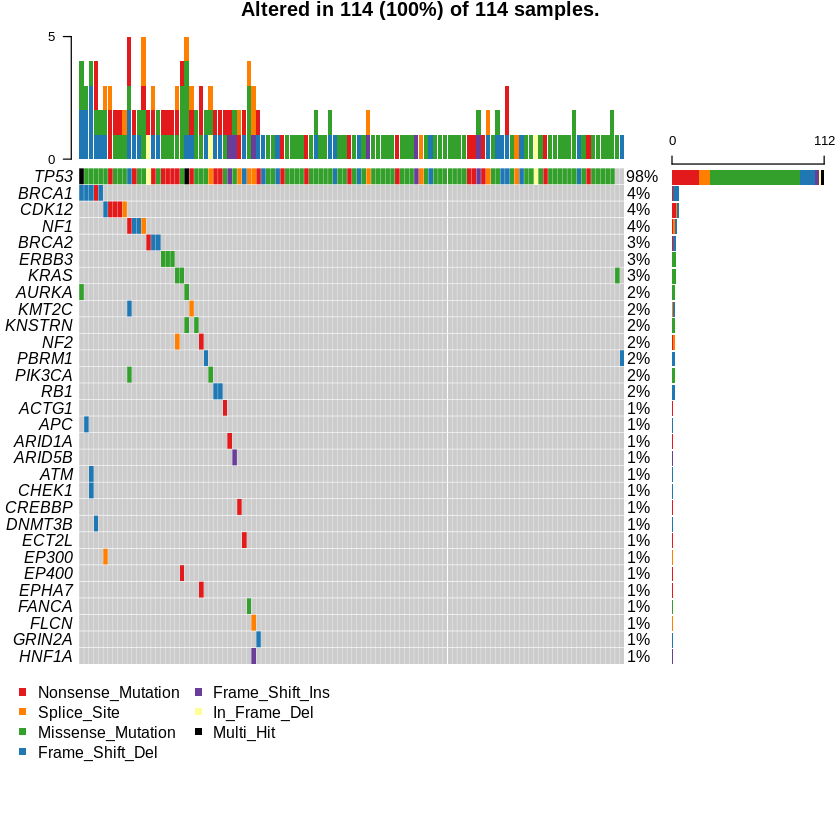

In [76]:
onco_kb_apollo = "/juno/work/shah/abramsd/oncokb-annotator/filtoutside.tsv"

okbapollo_laml = read.maf(maf=onco_kb_apollo)
data = okbapollo_laml@data
okbapollo_laml@data = data[data$oncogenic == "Oncogenic" | data$oncogenic == "Likely Oncogenic"]


genes = unique(okbapollo_laml@data$Hugo_Symbol)
# genes = genes[:15]
oncoplot(maf = okbapollo_laml, genes=c("ERBB3","PBRM1","KMT2C","NF2","RB1","KNSTRN", "AURKA", "KRAS", "BRCA2", "PIK3CA","TP53", "CDK12", "BRCA1", "NF1"))

# oncoplot(maf = okbapollo_laml, top=15, genes=c("ERBB3","PBRM1","KMT2C","NF2","RB1","KNSTRN", "AURKA", "KRAS", "BRCA2", "PIK3CA","TP53", "CDK12", "BRCA1", "NF1"))


In [6]:
okbapollo_laml

An object of class  MAF 
                        ID summary    Mean Median
 1:             NCBI_Build  GRCh37      NA     NA
 2:                 Center       .      NA     NA
 3:                Samples     217      NA     NA
 4:                 nGenes    9679      NA     NA
 5:        Frame_Shift_Del     533   2.468      2
 6:        Frame_Shift_Ins     126   0.583      0
 7:           In_Frame_Del     248   1.148      0
 8:           In_Frame_Ins      70   0.324      0
 9:      Missense_Mutation   24835 114.977     51
10:      Nonsense_Mutation     875   4.051      3
11:       Nonstop_Mutation      37   0.171      0
12:            Splice_Site     685   3.171      2
13: Translation_Start_Site      44   0.204      0
14:                  total   27453 127.097     60

-Reading
-Validating
--Removed 723417 duplicated variants
-Silent variants: 5446608 
-Summarizing
--Possible FLAGS among top ten genes:
  AHNAK2
  TTN
  AHNAK
  MUC17
  MUC5B
  OBSCN
-Processing clinical data
--Missing clinical data
-Finished in 00:01:24 elapsed (00:17:31 cpu) 
    [1] ""                    ""                    ""                   
    [4] ""                    ""                    ""                   
    [7] ""                    ""                    ""                   
   [10] ""                    ""                    ""                   
   [13] ""                    ""                    ""                   
   [16] ""                    ""                    ""                   
   [19] ""                    ""                    ""                   
   [22] ""                    ""                    "Likely Oncogenic"   
   [25] ""                    ""                    "Likely Oncogenic"   
   [28] ""                    ""                    "" 

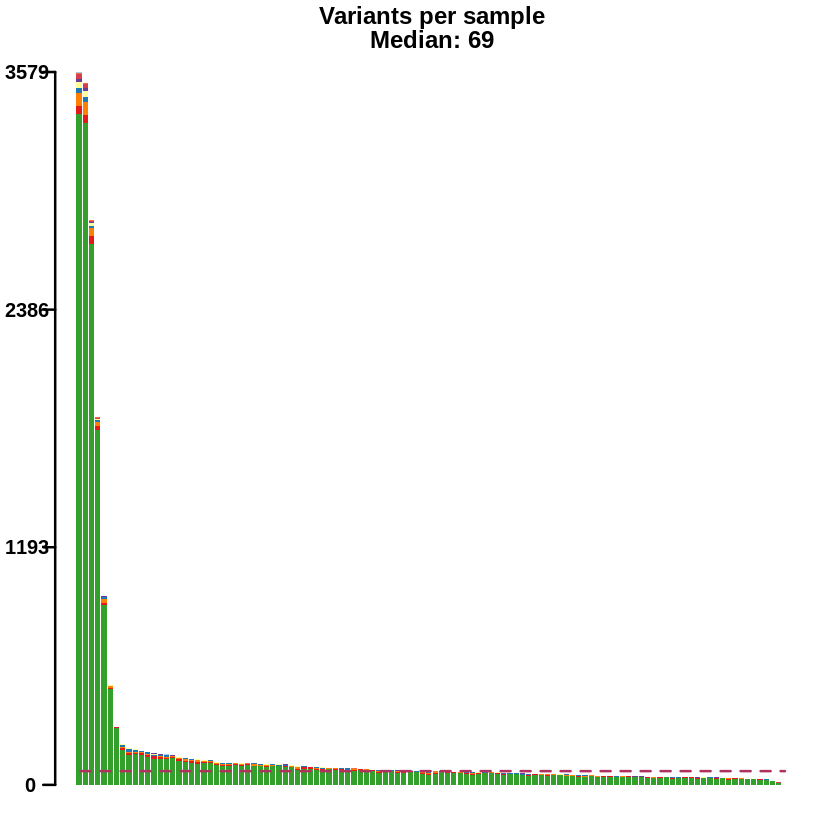

In [69]:
onco_kb_apollo = "/juno/work/shah/abramsd/oncokb-annotator/apollo_merged_maf_oncokb_patients.maf"

okbapollo_laml = read.maf(maf=onco_kb_apollo)
print(okbapollo_laml@data$oncogenic)

a=plotmafSummary(maf=okbapollo_lamladdStat = 'median')



In [64]:
#' Plots maf summary.
#'
#' @description Plots maf summary.
#' @param maf an \code{\link{MAF}} object generated by \code{\link{read.maf}}
#' @param dashboard If FALSE plots simple summary instead of dashboard style.
#' @param titvRaw TRUE. If false instead of raw counts, plots fraction.
#' @param log_scale FALSE. If TRUE log10 transforms Variant Classification, Variant Type and Variants per sample sub-plots.
#' @param rmOutlier If TRUE removes outlier from boxplot.
#' @param addStat Can be either mean or median. Default NULL.
#' @param showBarcodes include sample names in the top bar plot.
#' @param color named vector of colors for each Variant_Classification.
#' @param textSize font size if showBarcodes is TRUE. Default 0.8
#' @param titleSize font size for title and subtitle. Default c(10, 8)
#' @param fs base size for text. Default 1
#' @param top include top n genes dashboard plot. Default 10.
#' @param titvColor colors for SNV classifications.
#' @examples
#' laml.maf <- system.file("extdata", "tcga_laml.maf.gz", package = "maftools")
#' laml <- read.maf(maf = laml.maf, useAll = FALSE)
#' plotmafSummary(maf = laml, addStat = 'median')
#' @return Prints plot.
#' @import RColorBrewer
#' @seealso \code{\link{read.maf}} \code{\link{MAF}}
#' @export

plotmafSummary = function(maf, rmOutlier = TRUE, dashboard = TRUE, titvRaw = TRUE, log_scale = FALSE,
                          addStat = NULL, showBarcodes = FALSE, fs = 1,
                          textSize = 0.8, color = NULL, titleSize = c(1, 0.8), titvColor = NULL, top = 10){


  addStat.opts = c('mean', 'median')
  if(!is.null(addStat)){
    if(length(addStat) > 1){
      stop('addStat can only be either mean or median.')
    }

    if(! addStat %in% addStat.opts){
      stop('addStat can only be either mean or median.')
    }
  }


#   if(dashboard){
#     #Plot in dashboard style
#     pie = FALSE
#     dashboard(maf = maf, color = color, rmOutlier = TRUE, log_conv = log_scale,
#                           titv.color = titvColor, fontSize = fs, titleSize = titleSize, sfs = statFontSize,
#                           n = top, donut = pie, rawcount = titvRaw, stat = addStat, barcodes = showBarcodes, barcodeSize = textSize)


    if(is.null(color)){
      #hard coded color scheme if user doesnt provide any
      col = get_vcColors()
    }else{
      col = color
    }

    vcs = getSampleSummary(maf)
    vcs = vcs[,colnames(vcs)[!colnames(x = vcs) %in% c('total', 'Amp', 'Del', 'CNV_total')], with = FALSE]

    vcs = vcs[,c(1,order(colSums(x = vcs[,2:(ncol(vcs)), with =FALSE]), decreasing = TRUE)+1), with =FALSE] #order based on most event
    vcs.m = data.table::melt(data = vcs, id = 'Tumor_Sample_Barcode')
    colnames(vcs.m) = c('Tumor_Sample_Barcode', 'Variant_Classification', 'N')

    data.table::setDF(vcs)
    rownames(x = vcs) = vcs$Tumor_Sample_Barcode
    vcs = vcs[,-1]
    vcs = t(vcs)

    #--------------------------- variant per sample plot -----------------

#     graphics::layout(mat = matrix(c(1), nrow = 3, byrow = TRUE), heights = c(4, 4, 3))
    if(showBarcodes){
      par(mar = c(7, 2, 3, 1))
      b = barplot(vcs, col = col[rownames(vcs)], border = NA, axes = FALSE, names.arg =  rep("", ncol(vcs)))
      axis(side = 1, at = b, labels = colnames(vcs), font = 2, cex.axis = textSize, las = 2, lwd = 1)

    }else{
      par(mar = c(2, 2, 3, 1))
      b = barplot(vcs, col = col[rownames(vcs)], border = NA, axes = FALSE, names.arg =  rep("", ncol(vcs)))
    }

    axis(side = 2, at = as.integer(seq(0, max(colSums(vcs)), length.out = 4)), lwd = 2, font = 2, las = 2,
         line = -0.3, hadj = 0.6, cex.axis = fs)
    title(main = "Variants per sample", xlab="akj blkfbewkfbwkejbfwkebfkeqwb", line=2)#adj = 0, font = 2, line = 2)#cex.main = titleSize[1])

    if(!is.null(addStat)){
      if(addStat == 'mean'){
        med.line = round(maf@summary[nrow(maf@summary),Mean], 2)
        df = data.frame(y = c(med.line), x = as.integer(0.8*nrow(getSampleSummary(maf))), label = c(paste('Mean: ', med.line, sep='')))
      }else if(addStat == 'median'){
        med.line = round(maf@summary[nrow(maf@summary),Median], 2)
        df = data.frame(y = c(med.line), x = as.integer(0.8*nrow(getSampleSummary(maf))), label = c(paste('Median: ', med.line, sep='')))
      }
    }else{
      med.line = round(max(maf@summary[,Median], na.rm = TRUE), 2)
    }

    title(main = paste0("Median: ", med.line), line=1)# adj = 0, font = 2, line = 1,
    lines(x = c(1, b[length(b)]), y = c(med.line, med.line), col = "maroon", lwd = 2, lty = 2)

#     #--------------------------- vc summary plot -----------------
#     par(mar = c(2, 2, 2, 1))
#     boxH = vcs.m[,boxplot.stats(N)$stat[5], by = .(Variant_Classification)]
#     colnames(boxH)[ncol(boxH)] = 'boxStat'
#     b = boxplot(N ~ Variant_Classification, data = vcs.m, col = col[levels(vcs.m$Variant_Classification)],
#             axes = FALSE, outline = FALSE, lwd = 1, border = grDevices::adjustcolor(col = "black", alpha.f = 0.6))
#     axis(side = 2, at = as.integer(seq(0, max(boxH[,boxStat], na.rm = TRUE), length.out = 4)),
#          lwd = 2, font = 2, cex.axis = fs, las = 2)
#     title(main = "Variant Classification summary", adj = 0, cex.main = fs, font = 2, line = 1)

#     plot.new()
#     par(mar = c(4, 2.5, 0.5, 2))
#     legend(x = "top", legend = names(col[levels(vcs.m$Variant_Classification)]),
#            fill = col[levels(vcs.m$Variant_Classification)],
#            bty = "n", ncol = 3, cex = fs)
    }

get_vcColors = function(alpha = 1, websafe = FALSE, named = TRUE){
  if(websafe){
    col = c("#F44336", "#E91E63", "#9C27B0", "#673AB7", "#3F51B5", "#2196F3",
            "#03A9F4", "#00BCD4", "#009688", "#4CAF50", "#8BC34A", "#CDDC39",
            "#FFEB3B", "#FFC107", "#FF9800", "#FF5722", "#795548", "#9E9E9E",
            "#607D8B")
  }else{
    col = c(RColorBrewer::brewer.pal(11, name = "Paired"), RColorBrewer::brewer.pal(11,name = "Spectral")[1:3],'black', 'violet', 'royalblue', '#7b7060', '#535c68')
    col = grDevices::adjustcolor(col = col, alpha.f = alpha)
  }

  if(named){
    names(col) = names = c('Nonstop_Mutation','Frame_Shift_Del','IGR','Missense_Mutation','Silent','Nonsense_Mutation',
                          'RNA','Splice_Site','Intron','Frame_Shift_Ins','In_Frame_Del','ITD','In_Frame_Ins',
                          'Translation_Start_Site',"Multi_Hit", 'Amp', 'Del', 'Complex_Event', 'pathway')
  }

  col
}

